### Performing Linear Regression on Advertising dataset

### Why do you use Regression Analysis?
Regression analysis estimates the relationship between two or more variables.

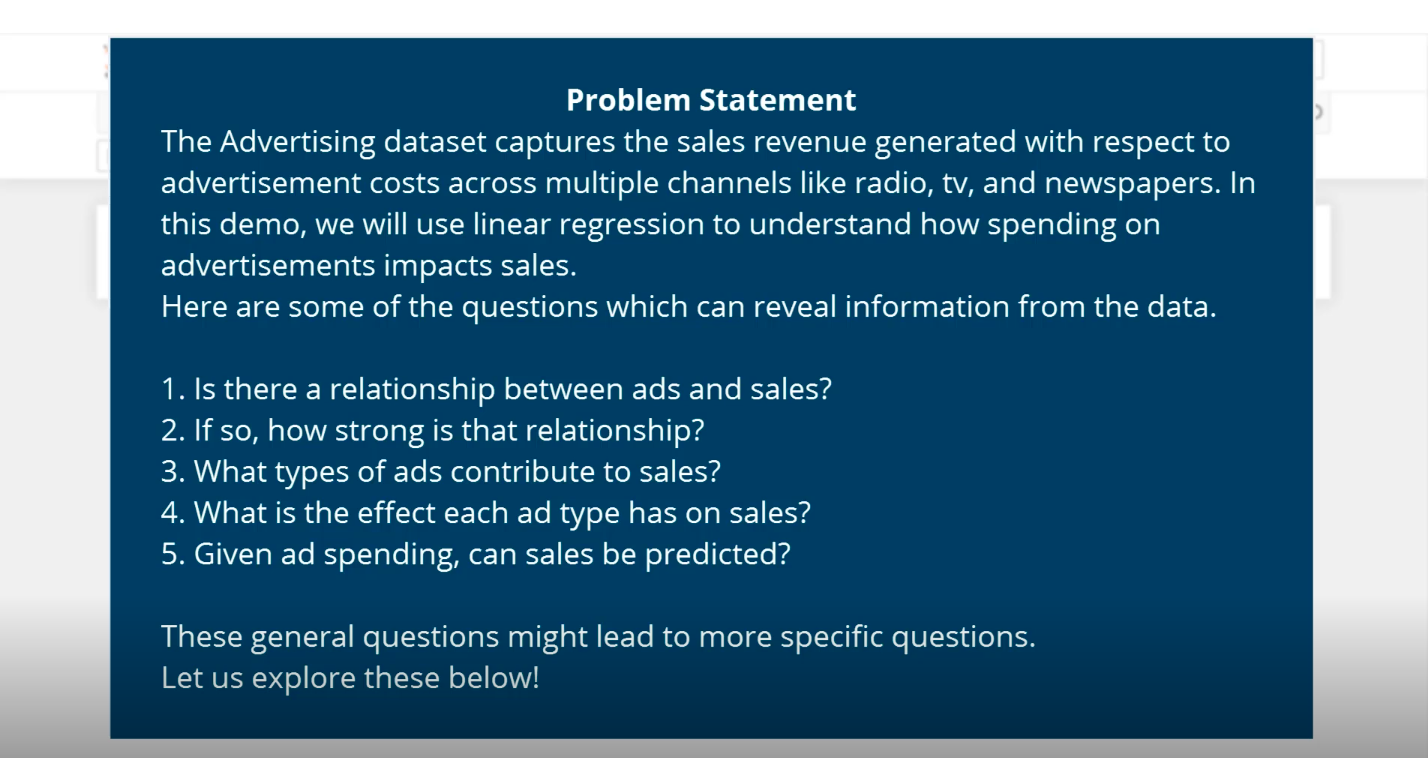

In [1]:
from IPython import display
display.Image("images/Picture1.png")

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [3]:
# read data into dataFrame
data = pd.read_csv('Datasets_Sep/OSL Datasets/Lesson_3/Datasets/Advertising.csv', index_col=0)
data.head()
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

### Indepenent variables

TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: Advertising dollars spent on Radio
Newspaper: Advertising dollars spent on Newspaper

*Target Variable *

Sales: sales of a single product in a given market (in thousands of widgets)

In [5]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

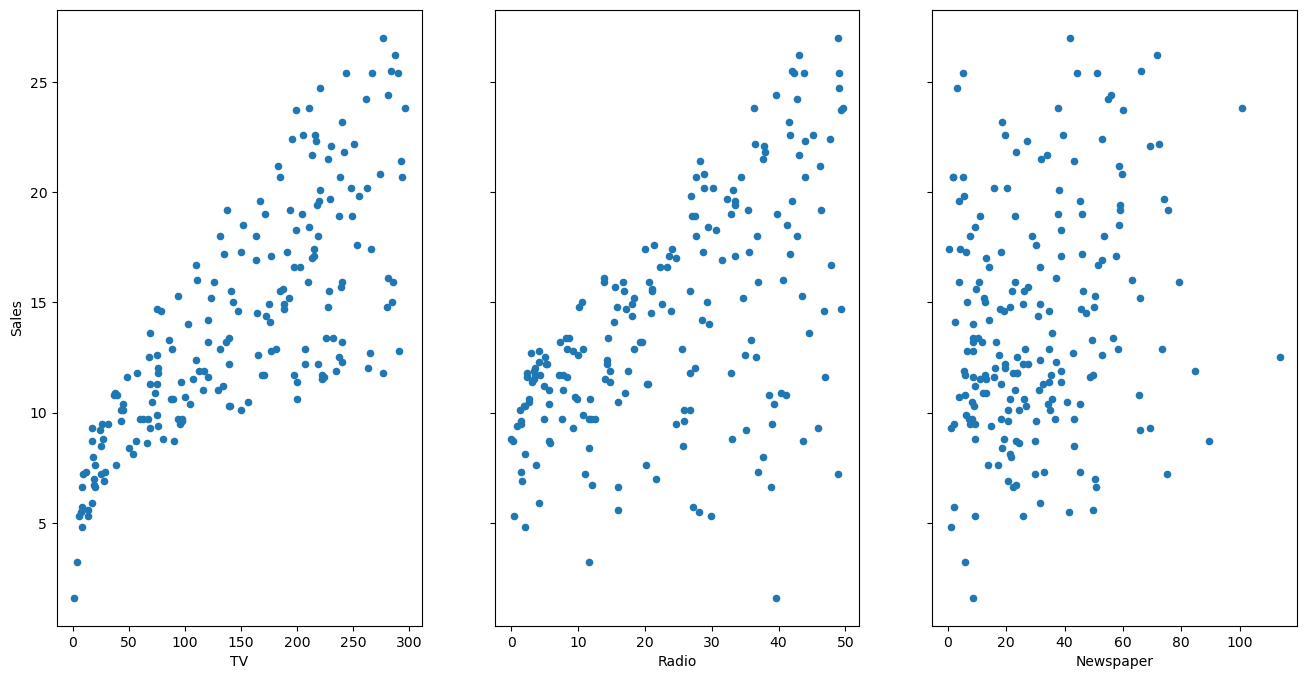

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)# one row , 3 columns
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

On the basis of this data, how should you spend advertising money in the future?
These general questions might lead you to more specific questions:

1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending, can sales be predicted?

Exploring these questions below.

In [5]:
# create X and y
# taking only one variable for now 
feature_cols = ['TV']
x = data[feature_cols]# independent
y = data.Sales#dependent

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [9]:
# Print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


## Interpreting Model Coefficients

How do you interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending was **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads was **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. How would you predict the sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [10]:
#manually calculate the prediction
7.032594+0.047537*50

9.409444

Thus, you would predict Sales of **9,409 widgets** in that market.

In [11]:
#predict new x value
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [12]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [13]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({"TV":[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [14]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

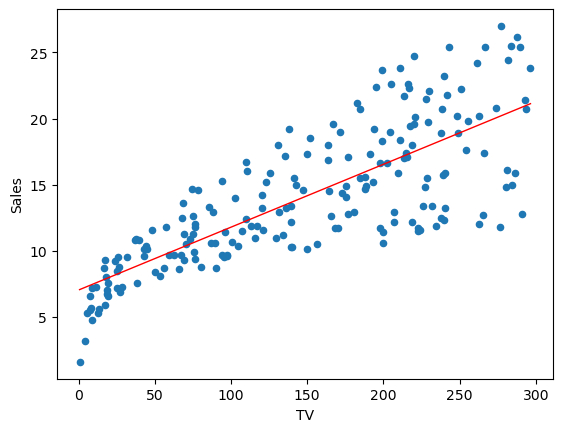

In [16]:
# first, plot the obverved data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=1)

## Confidence in the Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** It's a High bias/low variance model. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data.

A closely related concept is **confidence intervals**. Statsmodels calculate 95% confidence intervals for your model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [17]:
import statsmodels.formula.api as smf 
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that you only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know.
You estimate the coeffeicient with the data you have and indicate uncertainity about the estimate by giving a range that the co-efficient is probably within

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How to test this hypothesis? Intuitively,  reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [18]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so there is a relationship between TV ads and Sales. Generally the p-value is ignored for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

In [19]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [23]:
# create X and y
feature_cols= ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

#create train and test split
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X,y,test_size=0.3, random_state=42)

In [24]:
#without using train and test split dataset
lm = LinearRegression()
lm.fit(X,y)

#Print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [25]:
#using train, test datasets

lm = LinearRegression()
lm.fit(xtrain, ytrain)

#Print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

#prediction on test dataset
predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

2.70894909251591
[0.04405928 0.1992875  0.00688245]
1.9485372043446387


How to interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** was associated with an **increase in Sales of 45.765 widgets**.

A lot of the information to review piece-by-piece is available in the model summary output:

In [28]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper' , data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        16:11:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things you learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus, reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending was **slightly negatively associated** with Sales. (However, this is irrelevant since as you have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do you decide **what features have to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [29]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [30]:
# add Newspaper to the model (which has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Handling Categorical Predictors with Two Categories

Up until now, all the predictors have been numeric. What if one of the predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [31]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, you need to represent all data **numerically**. If the feature only has two categories, you can simply create a **dummy variable** that represents the categories as a binary value:

In [32]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [33]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

How do you interpret the **IsLarge coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market was associated with an average **increase** in Sales of 57.42 widgets (as compared to a Small market, which is called the **baseline level**).

What if you had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [34]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


You have to represent Area numerically, but  can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, create **another dummy variable**:

In [35]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


Here is how you interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do you only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why you only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [36]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


How do you interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area it is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area it is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (1, 2, 3, 4, 5).

# Voice Categorization - Case Study

# Data Set: Voice Data Set

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3800 recorded voice samples. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages.

The following acoustic properties of each voice are measured and included within the CSV:

<ul>
<li><strong>meanfreq</strong>: mean frequency (in kHz)</li>
<li><strong>sd</strong>: standard deviation of frequency</li>
<li><strong>median</strong>: median frequency (in kHz)</li>
<li><strong>Q25</strong>: first quantile (in kHz)</li>
<li><strong>Q75</strong>: third quantile (in kHz)</li>
<li><strong>IQR</strong>: interquantile range (in kHz)</li>
<li><strong>skew</strong>: skewness (see note in specprop description)</li>
<li><strong>kurt</strong>: kurtosis (see note in specprop description)</li>
<li><strong>sp.ent</strong>: spectral entropy</li>
<li><strong>sfm</strong>: spectral flatness</li>
<li><strong>mode</strong>: mode frequency</li>
<li><strong>centroid</strong>: frequency centroid (see specprop)</li>
<li><strong>peakf</strong>: peak frequency (frequency with highest energy)</li>
<li><strong>meanfun</strong>: average of fundamental frequency measured across acoustic signal</li>
<li><strong>minfun</strong>: minimum fundamental frequency measured across acoustic signal</li>
<li><strong>maxfun</strong>: maximum fundamental frequency measured across acoustic signal</li>
<li><strong>meandom</strong>: average of dominant frequency measured across acoustic signal</li>
<li><strong>mindom</strong>: minimum of dominant frequency measured across acoustic signal</li>
<li><strong>maxdom</strong>: maximum of dominant frequency measured across acoustic signal</li>
<li><strong>dfrange</strong>: range of dominant frequency measured across acoustic signal</li>
<li><strong>modindx</strong>: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range</li>
<li><strong>label</strong>: male or female</li>
</ul>

In [15]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
#read the data
df = pd.read_csv('Datasets_Sep/OSL Datasets/Lesson_3/Datasets/voice-classification.csv')

In [20]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [21]:
#check if there is missing values 
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [29]:
print ( "Shape of Data:" , df.shape)
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Shape of Data: (3168, 21)
Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [31]:
X = df.iloc[:,:-1]#select specific row and column
X.shape

(3168, 20)

In [33]:
#convert label column to integr

#import library
from sklearn.preprocessing import LabelEncoder
#get all rows, but only last column
y=df.iloc[:,-1] 
#Encode label category
#male: 1
#female: 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
#scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [35]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [36]:
#Train the model
#we will use Support Vector Machine Classifier

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix


In [37]:
#All default hyperparameters
svc_model=SVC()
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)

In [38]:
# Model evaluation
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9737118822292324


In [39]:
print(confusion_matrix(y_test,y_pred))

[[458  13]
 [ 12 468]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       471
           1       0.97      0.97      0.97       480

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [42]:
# lets try if we can get better score
from sklearn.model_selection import GridSearchCV

#Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [43]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.2s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [44]:
#** Now, take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. **

grid_predictions = grid.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,grid_predictions))

Accuracy Score:
0.9747634069400631


In [45]:
print(confusion_matrix(y_test,grid_predictions))

[[459  12]
 [ 12 468]]


In [46]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       471
           1       0.97      0.97      0.97       480

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

